In [29]:

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/My Drive/Projects/Colab Notebooks/pchallenge2.zip" 

In [4]:
train_dataAugmentation = ImageDataGenerator(
  #  rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    # shear_range=45,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

test_dataAugmentation = ImageDataGenerator(rescale=1./255)

train_data_generator=train_dataAugmentation.flow_from_directory('pchallenge2/train',
                                                 target_size=(200,200),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_data_generator =test_dataAugmentation.flow_from_directory('pchallenge2/validation',
                                        target_size=(200,200),
                                       batch_size=50,
                                       class_mode='categorical')


Found 5700 images belonging to 8 classes.
Found 2300 images belonging to 8 classes.


In [5]:

train_data_generator.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

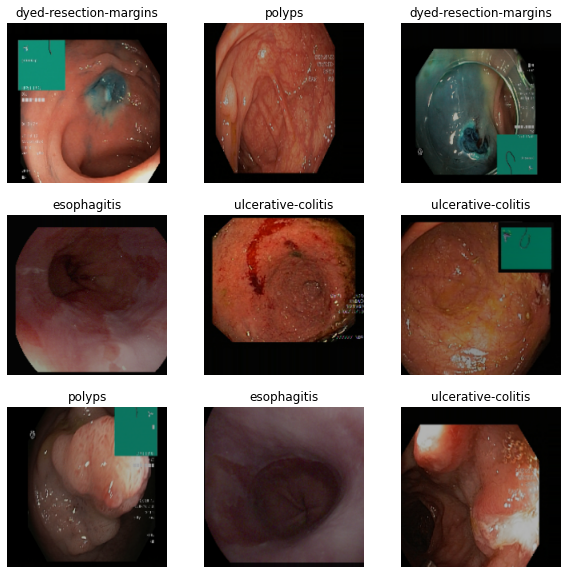

In [6]:
class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in train_data_generator:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break

In [13]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
                               generator=train_data_generator,
                               validation_data=test_data_generator,
                               validation_steps=test_data_generator.n//test_data_generator.batch_size,
                               epochs=100,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
)

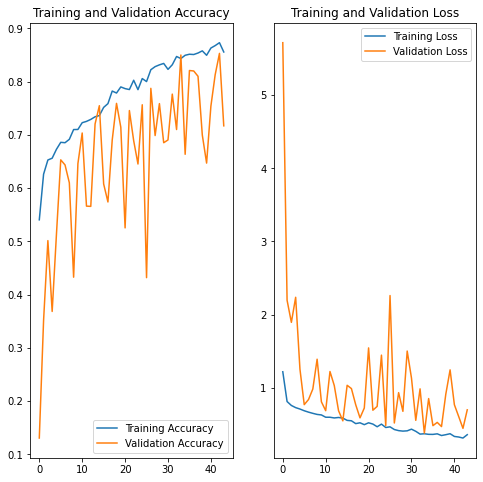

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
best_model = load_model(filepath='best_model.h5')
loss,acc=best_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

In [28]:
print ('The best model Loss : ',loss)
print ('The best model Accuracy : ',acc)

The best model Loss :  0.3826450705528259
The best model Accuracy :  0.8500000238418579


**Evaluate the model performance for 100 epochs**

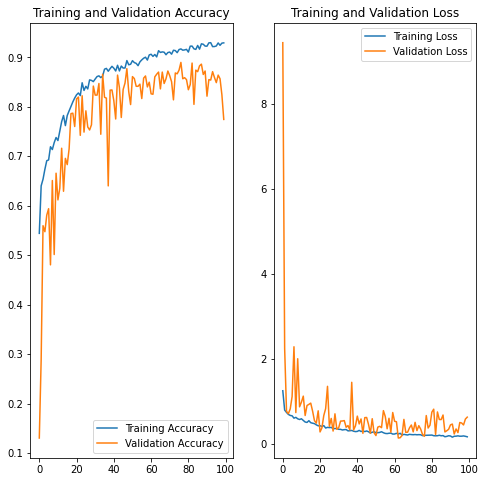

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()